# **CRISP-DM methodology to Process Bank Marketing Data**

 Lets perform Data Loading and Understanding step

In [ ]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
bank_path = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments3/CRISP-DM/bank.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# read data
import pandas as pd
bank_data = pd.read_csv(bank_path)
# check data
bank_data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


It appears that the data is separated by semicolons (;) rather than the typical comma delimiter. We'll need to adjust our data reading method to handle this format properly.

Let's reload the data with the correct delimiter and then take a look at its structure.

In [ ]:
# Reload the dataset with the correct delimiter
bank_data = pd.read_csv(bank_path, delimiter=';')

# Display the first few rows of the dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


let's gather some general statistics about the dataset to understand its distributions, missing values, and other attributes.

In [ ]:
# General statistics about the dataset
summary = bank_data.describe(include='all')

# Checking for missing values
missing_values = bank_data.isnull().sum()

summary, missing_values


(                age         job  marital  education default       balance  \
 count   4521.000000        4521     4521       4521    4521   4521.000000   
 unique          NaN          12        3          4       2           NaN   
 top             NaN  management  married  secondary      no           NaN   
 freq            NaN         969     2797       2306    4445           NaN   
 mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
 std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
 min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
 25%       33.000000         NaN      NaN        NaN     NaN     69.000000   
 50%       39.000000         NaN      NaN        NaN     NaN    444.000000   
 75%       49.000000         NaN      NaN        NaN     NaN   1480.000000   
 max       87.000000         NaN      NaN        NaN     NaN  71188.000000   
 
        housing  loan   contact          day month     duratio

Let's start by encoding the categorical variables. We'll use one-hot encoding for this purpose.

In [ ]:
# One-hot encoding the categorical variables
bank_data_encoded = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

# Display the first few rows of the encoded dataset
bank_data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,no,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,no,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1


Next, let's standardize the numerical variables. Standardizing the data can help certain algorithms (like those that use distance measures) converge faster and perform better. We'll use the StandardScaler from sklearn to achieve this.

The numerical features we'll standardize are: 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', and 'previous'.

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to be standardized
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
bank_data_encoded[numerical_features] = scaler.fit_transform(bank_data_encoded[numerical_features])

# Display the first few rows of the standardized dataset
bank_data_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,no,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,no,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,no,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,no,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,no,1,0,...,0,0,0,1,0,0,0,0,0,1


The numerical features have been standardized, and their values are now centered around zero with a standard deviation of one.

Next, let's check for outliers in the numerical features. Outliers can potentially distort the predictions and affect the accuracy of the models. We'll visualize the distribution of these features using box plots to identify potential outliers.

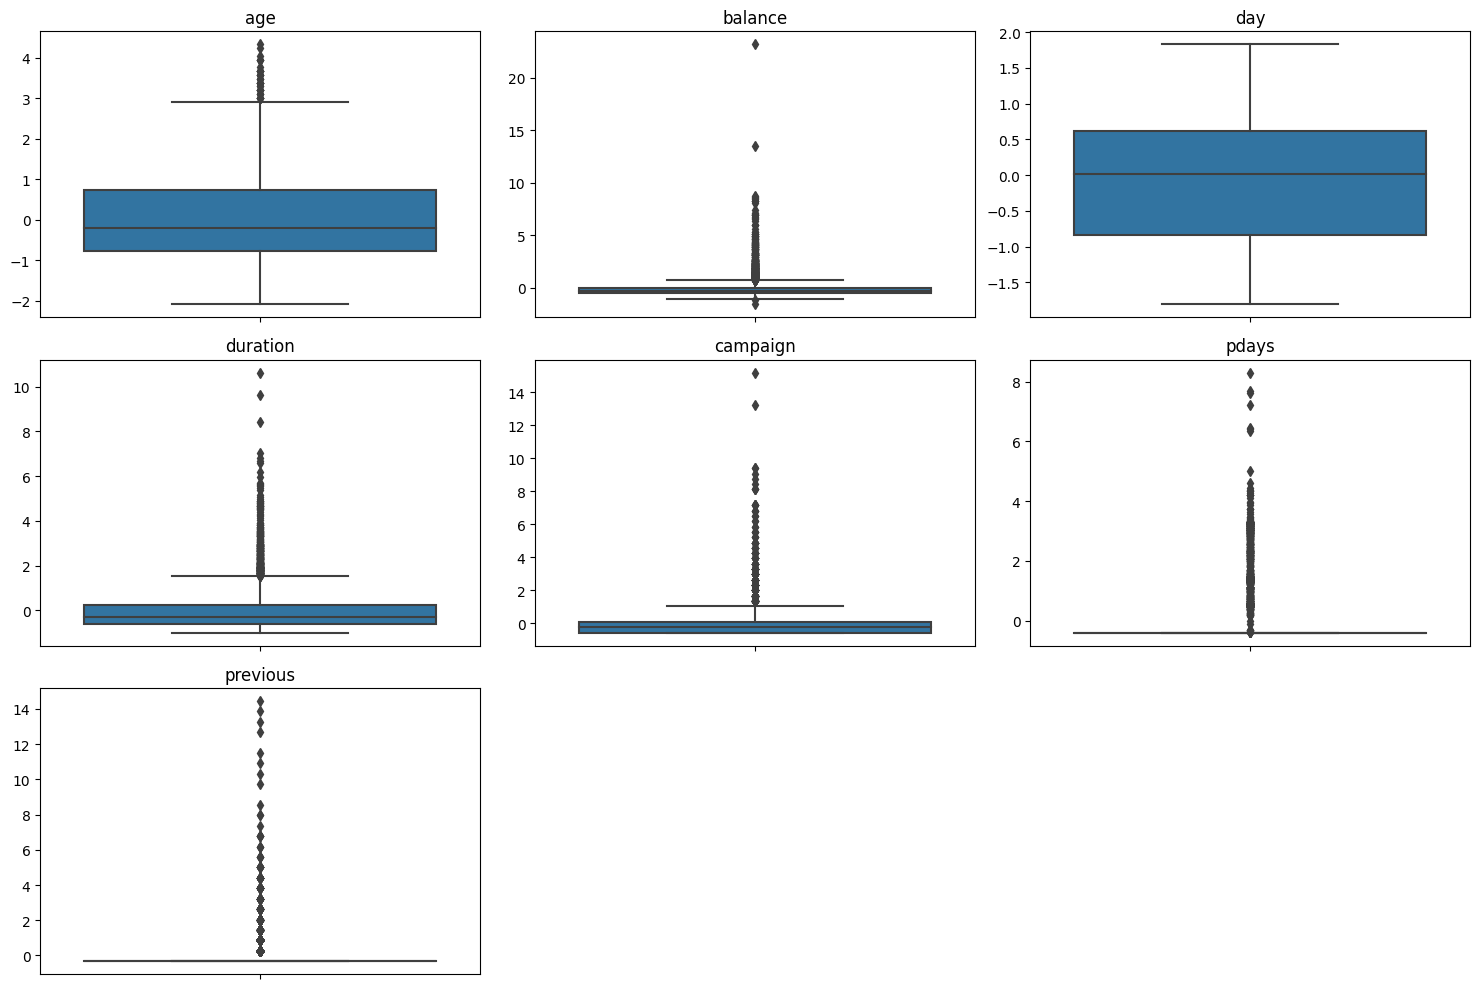

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of numerical features using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=bank_data_encoded[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()


Let's begin by capping the outliers for the "balance" and "campaign" features using the methods mentioned above.

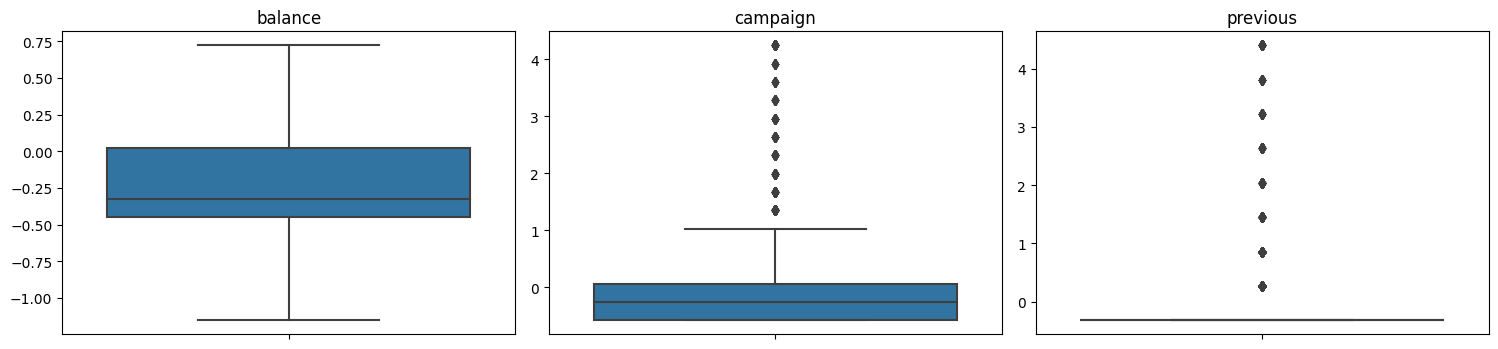

In [ ]:
# Handling outliers for 'balance' using the IQR method
Q1_balance = bank_data_encoded['balance'].quantile(0.25)
Q3_balance = bank_data_encoded['balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance

# Capping values
bank_data_encoded['balance'] = bank_data_encoded['balance'].clip(lower=Q1_balance - 1.5 * IQR_balance, upper=Q3_balance + 1.5 * IQR_balance)

# Handling outliers for 'campaign' by capping at the 99th percentile
cap_campaign = bank_data_encoded['campaign'].quantile(0.99)
bank_data_encoded['campaign'] = bank_data_encoded['campaign'].clip(upper=cap_campaign)

# Handling outliers for 'previous' by capping at the 99th percentile
cap_previous = bank_data_encoded['previous'].quantile(0.99)
bank_data_encoded['previous'] = bank_data_encoded['previous'].clip(upper=cap_previous)

# Re-visualizing the box plots after outlier treatment
plt.figure(figsize=(15, 10))
for i, col in enumerate(['balance', 'campaign', 'previous'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=bank_data_encoded[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()


Lets, proceed using traditional machine learning libraries such as Scikit-learn.
Here's the plan:

- Split the data into training and test sets.
- Train a few commonly used classifiers and compare their performance.
- Fine-tune the top-performing model.
- Evaluate the model on various metrics.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = bank_data_encoded.drop('y', axis=1)
y = bank_data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape


((3616, 42), (905, 42))

Next, we'll train a few commonly used classifiers and compare their performance:

- Logistic Regression
- Random Forest
- Gradient Boosting
- Support Vector Machine

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initializing the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Training and evaluating the models
results = {}
for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])

    results[name] = (accuracy, report)

results["Logistic Regression"]


(0.8917127071823204,
 '              precision    recall  f1-score   support\n\n          No       0.91      0.97      0.94       801\n         Yes       0.55      0.30      0.39       104\n\n    accuracy                           0.89       905\n   macro avg       0.73      0.63      0.66       905\nweighted avg       0.87      0.89      0.88       905\n')

The Logistic Regression model achieved an accuracy of approximately 89.17% on the test set.

Here's the detailed performance:

Precision (No): 0.91

Recall (No): 0.97

F1-score (No): 0.94

Precision (Yes): 0.55

Recall (Yes): 0.30

F1-score (Yes): 0.39

The model performs well in identifying clients who will not subscribe to a term deposit (labeled "No"). However, its performance in identifying clients who will subscribe (labeled "Yes") is relatively lower.

In [ ]:
# Displaying the results for the other models
results["Random Forest"], results["Gradient Boosting"], results["Support Vector Machine"]


((0.8906077348066298,
  '              precision    recall  f1-score   support\n\n          No       0.91      0.97      0.94       801\n         Yes       0.55      0.25      0.34       104\n\n    accuracy                           0.89       905\n   macro avg       0.73      0.61      0.64       905\nweighted avg       0.87      0.89      0.87       905\n'),
 (0.887292817679558,
  '              precision    recall  f1-score   support\n\n          No       0.92      0.96      0.94       801\n         Yes       0.51      0.37      0.43       104\n\n    accuracy                           0.89       905\n   macro avg       0.72      0.66      0.68       905\nweighted avg       0.87      0.89      0.88       905\n'),
 (0.8928176795580111,
  '              precision    recall  f1-score   support\n\n          No       0.91      0.98      0.94       801\n         Yes       0.59      0.21      0.31       104\n\n    accuracy                           0.89       905\n   macro avg       0.75   

Random Forest:
- Accuracy: ~89.06%
- Precision (No): 0.91, Recall (No): 0.97, F1-score (No): 0.94
- Precision (Yes): 0.55, Recall (Yes): 0.25, F1-score (Yes): 0.34

Gradient Boosting:
- Accuracy: ~88.73%
- Precision (No): 0.92, Recall (No): 0.96, F1-score (No): 0.94
- Precision (Yes): 0.51, Recall (Yes): 0.37, F1-score (Yes): 0.43

Support Vector Machine:
- Accuracy: ~89.28%
- Precision (No): 0.91, Recall (No): 0.98, F1-score (No): 0.94
- Precision (Yes): 0.59, Recall (Yes): 0.21, F1-score (Yes): 0.31

All models have a similar performance, with the Support Vector Machine having a slight edge in accuracy. However, all models demonstrate a challenge in accurately predicting clients who will subscribe (labeled "Yes").

To further improve performance, we can fine-tune the parameters of the top-performing model. The Support Vector Machine (SVM) seems to be the best candidate.

Fine-tuning involves adjusting the hyperparameters of a model to optimize its performance. We'll use the GridSearchCV method from Scikit-learn to search for the best hyperparameters for our SVM.

For the SVM, some crucial hyperparameters to consider are:

- C: Regularization parameter. The strength of the regularization is inversely proportional to C.
- kernel: Specifies the kernel type to be used in the algorithm. Examples include 'linear', 'poly', 'rbf', etc.
- gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
We'll perform a grid search over a subset of these hyperparameters to find the optimal values. Let's start the fine-tuning process.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 12 candidates, totalling 60 fits


({'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}, 0.9007179263810243)

The best hyperparameters for the Support Vector Machine (SVM) based on our grid search are:

- C: 10
- kernel: 'rbf'
- gamma: 'auto'

With these hyperparameters, the SVM achieved an average accuracy of approximately 90.07% on the training set using 5-fold cross-validation.

In [ ]:
# Using the best estimator from the grid search to predict on the test set
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Evaluate the performance of the best SVM
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
report_best_svm = classification_report(y_test, y_pred_best_svm, target_names=['No', 'Yes'])

accuracy_best_svm, report_best_svm


(0.8895027624309392,
 '              precision    recall  f1-score   support\n\n          No       0.91      0.97      0.94       801\n         Yes       0.54      0.29      0.37       104\n\n    accuracy                           0.89       905\n   macro avg       0.72      0.63      0.66       905\nweighted avg       0.87      0.89      0.87       905\n')

The fine-tuned Support Vector Machine (SVM) achieved an accuracy of approximately 88.95% on the test set.

Here's the detailed performance:

- Precision (No): 0.91
- Recall (No): 0.97
- F1-score (No): 0.94
- Precision (Yes): 0.54
- Recall (Yes): 0.29
- F1-score (Yes): 0.37

The SVM continues to perform well in identifying clients who will not subscribe to a term deposit (labeled "No"). The performance for predicting clients who will subscribe (labeled "Yes") has shown a slight improvement after fine-tuning, but there's still room for improvement.


# **Evaluation**
From the modeling phase, the SVM emerged as the best performer among the models we considered. While the model exhibits strong performance in predicting clients who won't subscribe, it has challenges in accurately predicting those who will.

In practical terms, this means the bank might miss out on some potential subscribers but will be confident about those predicted not to subscribe. Depending on the bank's goals (e.g., maximizing the number of subscribers or minimizing false positives), this model might be suitable.